First install the repo and requirements.

In [ ]:
%pip --quiet install git+https://github.com/wilson-labs/cola.git

# PCA on Massive Datasets

In this example we will show using CoLA to perform PCA on a massive dataset.

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

import time
import torch
import cola
import jax.numpy as jnp
#from cola.fns import lazify
# from cola.algorithms.svd import randomized_svd

N, D = 100000, 300
dtype = torch.float32
data = torch.randn(N, D, dtype=dtype)
dtype = jnp.float32
#data = jnp.array(data.numpy())

print(f"Dataset (N={data.shape[0]:,d} | D={data.shape[1]:,d})")

k = 50
X = cola.lazify(data)

Dataset (N=100,000 | D=300)


In [6]:
x = torch.linspace(-1,1,100)
C = cola.lazify(torch.exp(-2*(x[None]-x[:,None])**2))
C = C+1e-4*cola.ops.I_like(C)

In [4]:
C = X.T@X/N

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

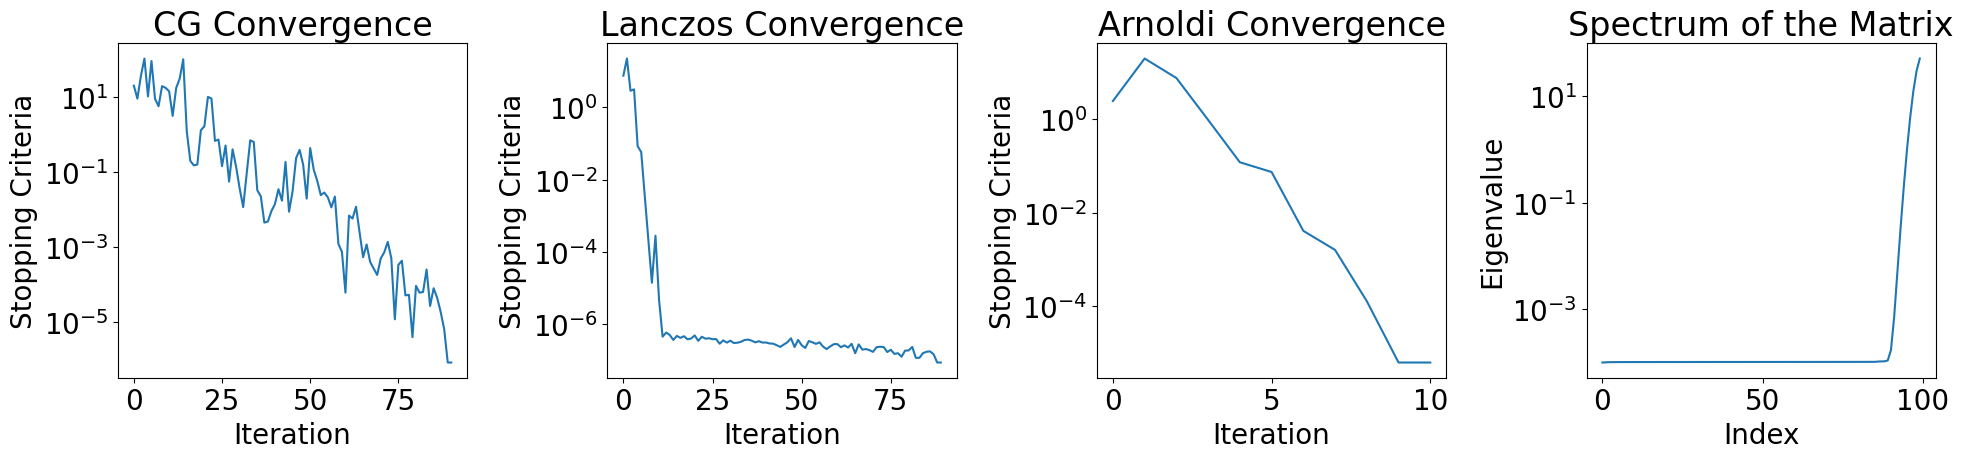

In [9]:
sol, info = cola.algorithms.cg(C, torch.randn(C.shape[-1]), pbar=True)
Q1,T,info2 = cola.algorithms.lanczos(C, pbar=True,max_iters=1000)
Q2,H,info3 = cola.algorithms.arnoldi(C,pbar=True, tol=1e-4,max_iters=1000)
eigs = cola.eig(cola.SelfAdjoint(C),pbar=True)[0]

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
algorithms = [('CG', info), ('Lanczos', info2), ('Arnoldi', info3)]
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, (name, info) in enumerate(algorithms):
    axs[i].plot(info['errors'])
    axs[i].set_yscale('log')
    axs[i].set_title(f'{name} Convergence')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Stopping Criteria')

axs[3].plot(eigs)
axs[3].set_yscale('log')
axs[3].set_title('Spectrum of the Matrix')
axs[3].set_xlabel('Index')
axs[3].set_ylabel('Eigenvalue')

plt.tight_layout()
plt.show()

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'lanczos convergence on 300x300 matrix')

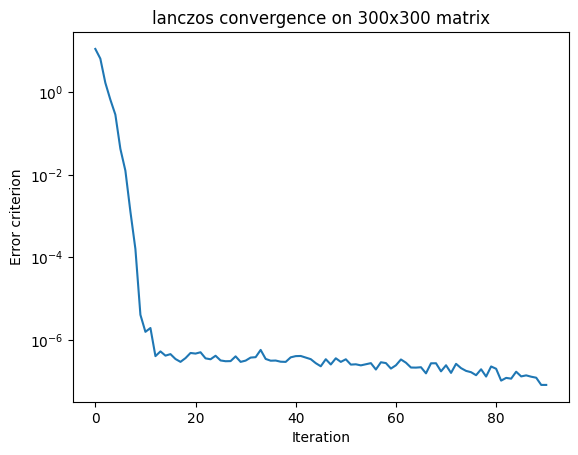

In [36]:
Q,T,info = cola.algorithms.lanczos(C, pbar=True,max_iters=1000)
plt.plot(info['errors'])
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error criterion')
plt.title('lanczos convergence on 300x300 matrix')

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'CG convergence on 300x300 matrix')

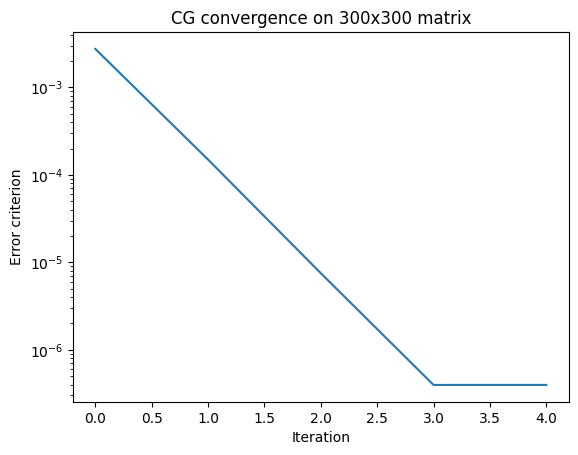

In [31]:
x, info = cola.algorithms.cg(C, torch.randn(C.shape[-1]), pbar=True)
plt.plot(info['errors'])
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error criterion')
plt.title('CG convergence on 300x300 matrix')

Text(0, 0.5, 'Error criterion')

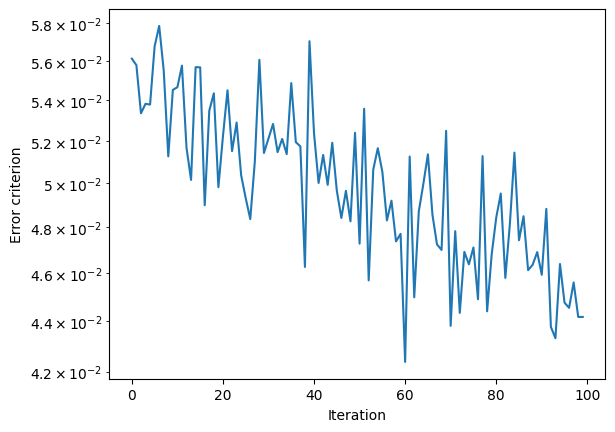

In [19]:
import matplotlib.pyplot as plt
plt.plot(info['errors'])
plt.yscale('log')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error criterion')

In [11]:
eigs = cola.eig(C,pbar=True,tol=1e-4,method='krylov',max_iters=100)[0]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
eigs = cola.eig(cola.SelfAdjoint(C),pbar=True,tol=1e-6,method='krylov',max_iters=1000)[0]

Running body_fun:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
%debug

> /data/users/marc_f/cola/cola/utils/torch_tqdm.py(67)update_pbar()
     65 def update_pbar(error, tol, info):
     66     errstart = info.setdefault('errstart', error)
---> 67     progress = max(100 * np.log(error / errstart) / np.log(tol / errstart) - info['progval'], 0)
     68     progress = min(100 - info['progval'], progress)
     69     if progress > 0:

0.0 0.0 0.0001
0.0 0.0 0.0001
0.0 0.0 0.0001


In [3]:
import jax
P = jax.jit(cola.algorithms.power_iteration, static_argnums=(0,1,2,3,4,5))
a,v, info = P(C,pbar=True,info=True, tol=1e-2)

Running body:   0%|          | 0/100 [00:00<?,?it/s]

In [4]:
info

{}

In [5]:
inv= cola.inverse(cola.SelfAdjoint(C),pbar=True,info=True,method='krylov',tol=1e-2)
inv@C.ops.ones(C.shape[:1],C.dtype)

Running body_fun:   0%|          | 0/100 [00:00<?,?it/s]

Array([1.0324442 , 1.0674736 , 1.0347737 , 0.98613876, 1.1044202 ,
       0.9663931 , 0.971528  , 1.024705  , 1.0205234 , 1.1353885 ,
       1.0444454 , 0.9898392 , 1.0785855 , 1.0788229 , 1.0333313 ,
       1.0048164 , 0.979654  , 1.0294789 , 0.9680885 , 1.0490725 ,
       0.9666235 , 1.0007157 , 0.9818945 , 0.95554715, 1.0527668 ,
       0.95988727, 1.0225154 , 1.0347    , 1.0575426 , 0.91583496,
       0.9738532 , 0.96137923, 1.06761   , 1.1235957 , 0.9693678 ,
       1.072281  , 0.9646544 , 1.033497  , 1.0273887 , 0.95487016,
       1.0309575 , 1.0465803 , 0.9815441 , 0.9269393 , 0.96078527,
       0.9740837 , 1.0166415 , 0.95634097, 0.9290672 , 0.95050204,
       0.95362216, 1.0184866 , 0.9607811 , 1.0713391 , 0.89858437,
       0.97377306, 1.0029553 , 0.99890304, 0.97815055, 1.0609416 ,
       1.020308  , 0.96039903, 1.0276415 , 0.9667356 , 0.99179304,
       1.0198739 , 1.000656  , 1.0265386 , 0.9799702 , 1.0454187 ,
       0.96207404, 0.9343594 , 1.0151007 , 0.9371575 , 1.11296

In [6]:
inv.info

{'errors': array([0.05306752, 0.00300517], dtype=float32),
 'iteration_time': 0.12758525212605795,
 'iterations': Array(2, dtype=int32, weak_type=True)}

In [31]:
U,S,Vh= cola.svd(X, rank=300)

tensor(0.8943) tensor(1.1139)


In [21]:
U2 = (X@Vh.H)/S

In [22]:
torch.linalg.norm(U-U2)

tensor(0.)

In [23]:
print(U.shape,S.shape,Vh.shape,X.shape)

torch.Size([100000, 300]) torch.Size([300]) torch.Size([300, 300]) torch.Size([100000, 300])


In [24]:
diff  = cola.lazify(U)@cola.diag(S)@cola.lazify(Vh) - X

In [25]:
torch.linalg.norm(diff.to_dense())/torch.linalg.norm(X.to_dense())

tensor(1.2632e-06)

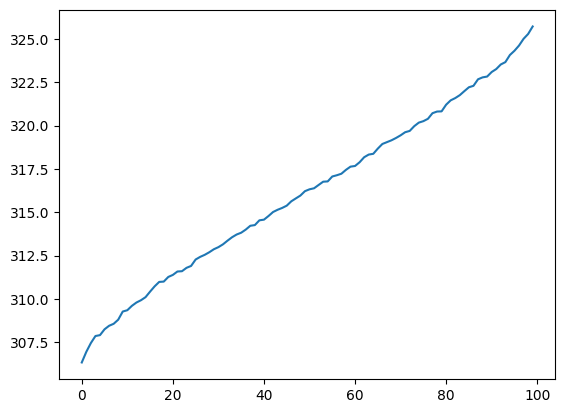

In [8]:
import matplotlib.pyplot as plt
plt.plot(S)

$X X^{T}$

# Linear Regression

In this notebook

In [12]:
import cola
import numpy as np

Phi = np.random.randn(100, 10)
y = np.random.randn(100)

In [13]:
beta = cola.pinv(cola.lazify(Phi))@y

(10, 10)
(10, 10)


# Gaussian Processes

# Spectral Clustering

# Boundary Value PDEs

In this example we will show how CoLA can be used to solve linear and nonlinear boundary value PDEs.

## Laplace Equation $\Delta u = 0$

For this example we will solve the Laplace equation on an irregularly shaped domain with given boundary conditions using a finite difference discretization.

First lets create a 1000 x 1000 point coordinate mesh.

In [1]:
import numpy as np
import jax.numpy as jnp
import scipy
import jax


N=1000
ndims = 2

xgrid = jnp.linspace(-1,1,N)
xygrid = jnp.stack(jnp.meshgrid(*(ndims*[xgrid])),axis=-1)
dx = xgrid[1]-xgrid[0]
x,y = xygrid.transpose((2,0,1))

With the mesh, lets define the geometry of the PDE domain and boundary conditions. The domain need not be square as shown below. For boundary conditions, we will set them to be $B(x,y) = (x+y)\cos(2x)$ on the boundary of this domain.

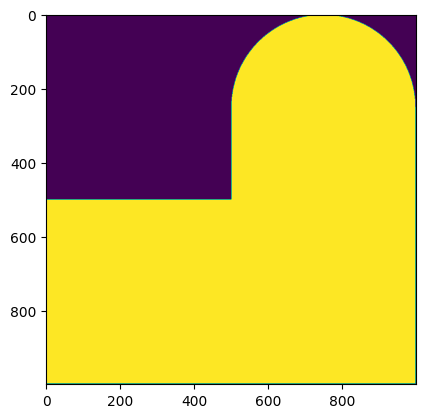

In [2]:
domain = (((x>0)|(y>0))&((y>-.5)|((x-.5)**2+(y+.5)**2<.5**2))) # chosen for example
# reduce the domain by one pixel leave space for the boundary conditions
domain &= ~(scipy.signal.convolve2d((~domain).astype(np.float32),jnp.ones((3,3)),mode='same',fillvalue=1)>0)
domain_ids, = domain.reshape(-1).nonzero()

BCS = jnp.where(domain,jnp.zeros_like(x),(x+y)*jnp.cos(2*x))


import matplotlib.pyplot as plt
plt.imshow(domain)
plt.show()


Now we need to define the Laplacian $\Delta$ as it acts on this discretized domain. 
Supposing we have the two dimensional array $v[i,j]$ representing the values on the grid, we can use the centered difference stencil for second derivatives $\partial_x^2 v(x_i,y_j) = (v[i+1, j] - 2*v[i, j] + v[i-1, j])/h^2$ + O(h^3)$.

Equivalently, we can write this as a convolution $\partial_x^2 v(x_i,y_j) =(1/h^2) (\begin{bmatrix}1& -2 &1\end{bmatrix} * v)[i,j] + O(h^3)$ where $*$ is the discrete convolution. The discretized 2d Laplacian is therefore

$Lv = (\begin{bmatrix}1& -2 &1\end{bmatrix} * v + \begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix} *v)/h^2$. 

From this matrix vector multiply, we can define the linear operator using CoLA.

In [3]:
import cola
from jax import vmap, jit

def laplacian(x):
    x = x.reshape(ndims*(N,)) # unflatten to an ndims-dimensional grid
    cderiv = lambda x: jax.scipy.signal.correlate(x,jnp.array([1.,-2,1.])/dx**2,mode='same')
    return sum([jnp.apply_along_axis(cderiv,i,x) for i in range(ndims)]).reshape(-1)

Lfull = cola.LinearOperator(jnp.float32,shape=(N**ndims,N**ndims),matmat=jit(vmap(laplacian,-1,-1)))

Lfull is defined on the full $1000 \times 1000$ grid rather than our irregularly shaped domain. Restrict it to the domain, we just need to select the indices of the points inside the domain by slicing it, as you would a matrix.

In [4]:
L = Lfull[domain_ids,domain_ids]

Since this would ignore the boundary conditions, we can simply add them in on the right hand side.

In [5]:
RHS = -(Lfull@BCS.reshape(-1))[domain_ids]

Finally, let's solve the linear system represented by this discretized laplacian and the boundary conditions

$Lv = b$

and annotate that $L$ is a symmetric operator to speed up the computation.

In [7]:
L = cola.Symmetric(L)
inv = cola.inverse(L,info=True,pbar=True)
v  = inv@RHS

Though we need to invert a $1000000 \times 1000000$ sized matrix, the solution is produced very quickly because CoLA never forms the matrix explicitly, and we can visualize the solution below.

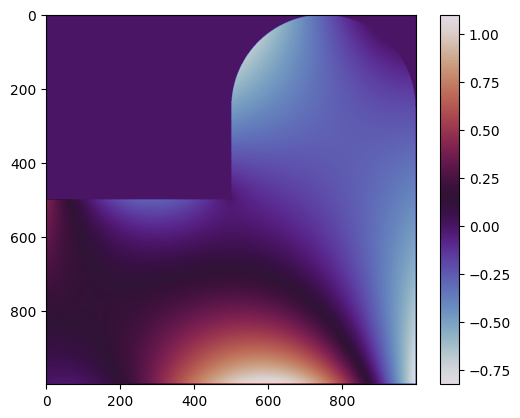

In [8]:
out_img = jnp.zeros(domain.shape)
out_img = out_img.at[domain].set(v)

plt.imshow(out_img,cmap='twilight')
plt.colorbar()
plt.show()

## Nonlinear BVP: Minimal Surface Equation

In this example we will consider solving the minimal surface equation, and example of a nonlinear boundary value PDE describing the shape of a soap bubble with a fixed boundary.
For the minimal surface, we would like to solve for the height $z$ of the surface at each point $(x,y)$ on the domain, and we make the assumption that the height is single valued.

The PDE is given by

$(1+z_x^2)z_{yy} - 2z_x z_y z_{xy} + (1+z_y^2)z_{xx}=0$

 where subscripts denote partial derivatives.
We will solve the PDE on the domain $[-1,1]^2$ with the boundary conditions

$z(x,\pm 1) = 1-x^2$ and $z(\pm 1, y) = 0$.

Before solving, first we will define the mesh and the nonlinear pde constraint.

In [9]:
N=100
xgrid = jnp.linspace(-1,1,N)
xygrid = jnp.stack(jnp.meshgrid(xgrid,xgrid),axis=-1)
dx = xgrid[1]-xgrid[0]

def pde_constraint(z):
    deriv = lambda x: jax.scipy.signal.correlate(x,jnp.array([-1/2,0,1/2])/dx,mode='same')
    deriv2 = lambda x: jax.scipy.signal.correlate(x,jnp.array([1.,-2,1.])/dx**2,mode='same')
    zx,zy = [jnp.apply_along_axis(deriv,i,z) for i in [0,1]]
    zxx,zyy = [jnp.apply_along_axis(deriv2,i,z) for i in [0,1]]
    zxy  = jnp.apply_along_axis(deriv,1,zx)
    return (1+zx**2)*zyy-2*zx*zy*zxy+(1+zy**2)*zxx

x,y = xygrid.transpose((2,0,1))
domain = (jnp.abs(x)<1)&(jnp.abs(y)<1)
boundary_vals = np.zeros_like(x)
boundary_vals[:,0] = 1-y[:,0]**2
boundary_vals[:,-1] = 1-y[:,-1]**2

@jit
def pde_constraint_on_domain(u):
    padded_domain = jnp.zeros(boundary_vals.shape)+boundary_vals
    padded_domain = padded_domain.at[domain].set(u.reshape(-1))
    padded_domain = pde_constraint(padded_domain)
    return padded_domain[domain].reshape(u.shape)

Now that we have defined the PDE constraint discretized on the domain,
we can now interpret the problem as finding the roots to a nonlinear function
$F(z)=0$ where $F$ is the discretized PDE constraint, and $z$ is a vector representing the heights at the different points on the domain.

To find the roots, we can employ Newtons method:

$z \gets z - J^{-1} F(z)$

where $J$ is the Jacobian of $z$.
While $J$ will be a large $N^2 \times N^2$ matrix, with CoLA we can perform this solve efficiently. For this we will use the CoLA [Jacobian](https://CoLA.readthedocs.io/en/latest/package/cola.ops.html#cola.ops.Jacobian) LinearOperator.

In [11]:
# Newton Raphson iteration
tol = 3e-3

z = jnp.zeros_like(x[domain]).reshape(-1) # initial guess
err = np.inf
while err > tol:
    F = pde_constraint_on_domain(z)
    err = jnp.max(jnp.abs(F))
    J = cola.ops.Jacobian(pde_constraint_on_domain,z)
    z -= cola.inverse(J)@F
    print(f"PDE Error: {err:1.1e}")

PDE Error: 2.4e+03
PDE Error: 6.8e+02
PDE Error: 2.0e+02
PDE Error: 4.0e+01
PDE Error: 1.8e+01
PDE Error: 8.3e+01
PDE Error: 1.5e+01
PDE Error: 5.0e+00
PDE Error: 3.8e+00
PDE Error: 1.1e+00
PDE Error: 1.4e-01
PDE Error: 8.6e-02
PDE Error: 2.4e-02
PDE Error: 2.4e-03


Now let's visualize the results.

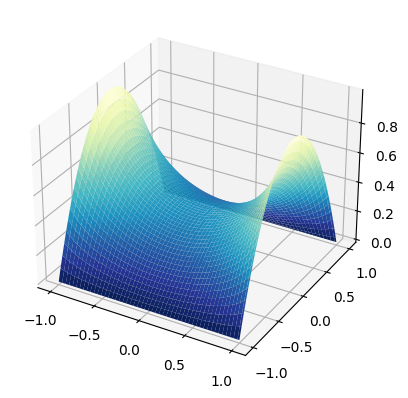

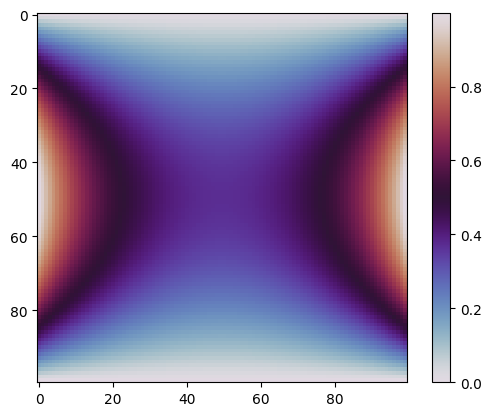

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
img = jnp.zeros(boundary_vals.shape)+boundary_vals
img = img.at[domain].set(z)
ax.plot_surface(x, y, img, cmap=plt.cm.YlGnBu_r)
plt.show()

plt.imshow(img,cmap='twilight')
plt.colorbar()
plt.show()

We see the minimal surface forms a familiar saddle shape, a solution of negative curvature like other solutions to the minimal surface equation.

# Diagonalizing a Hamiltonian (PDE eigenvalue problems)

## Solving the Schrodinger Equation for a 2d Harmonic oscillator

Solving the Schrödinger equation for a Quantum Harmonic Oscillator
In this example, we will show how to use the CoLA library to solve for the eigenvalues and eigenfunctions of the Hamiltonian operator for a two-dimensional quantum harmonic oscillator. The Hamiltonian operator is defined as

H = -Δ/2 + V(x)

where Δ is the Laplacian operator and V(x) is the potential energy function. We will be using a discretized Laplacian on a square grid and a simple harmonic potential V(x) = x²/2.

To start, let's create a 1000 x 1000 point coordinate mesh:

In [47]:
import numpy as np
import jax.numpy as jnp
from jax import vmap, jit
import jax
import cola
from jax.config import config; config.update("jax_enable_x64", False)
#jax.config.update('jax_platform_name', 'cpu')

N = 300
ndims = 2
grid = jnp.linspace(-30,30,N)
dx = grid[1]-grid[0]
xyz = jnp.stack(jnp.meshgrid(*(ndims * [grid])), axis=-1).reshape(-1, ndims)

Here, N is the number of points in each dimension, ndims is the number of dimensions, and grid represents the grid points from -30 to 30. dx represents the grid spacing, and xyz is an array of 2D points representing the coordinates of each point in the grid.

Next, we define the Laplacian operator. We use the same finite difference stencil as in the previous example to discretize the Laplacian.

In [48]:
def laplacian(x):
    x = x.reshape(ndims*(N,)) # unflatten to an ndims-dimensional grid
    cderiv = lambda x: jax.scipy.signal.correlate(x,jnp.array([1.,-2,1.])/dx**2,mode='same')
    return sum([jnp.apply_along_axis(cderiv,i,x) for i in range(ndims)]).reshape(-1)

L = cola.ops.LinearOperator(jnp.float64, shape=(N**ndims, N**ndims), matmat=jit(vmap(laplacian, -1, -1)))

The function laplacian calculates the second derivative along each dimension and sums them up. The result is reshaped to a 1D array and returned.

Next, we define the potential function V(x) as a diagonal operator:

In [50]:
def vfn(x):
    return (x * x).sum() / 2

V = cola.diag(vmap(vfn)(xyz).reshape(-1))

vfn calculates the potential energy for a given point in the grid. cola.diag creates a diagonal operator with the calculated potential energy values on the diagonal. vmap is a function from the JAX library that applies the function vfn to each point in xyz.

Next, we define the Hamiltonian operator and compute its eigenvalues and eigenvectors:

In [53]:
H = -L / 2 + V
energy_levels, eigenfunctions = cola.eig(cola.Symmetric(H))

/data/users/marc_f/cola/cola/jax_fns.py:156: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return jnp.zeros(shape=shape, dtype=dtype)
/data/users/marc_f/cola/cola/jax_fns.py:164: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in array is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return jnp.array(arr, dtype=dtype)


The Hamiltonian operator H is defined as the sum of the kinetic energy operator (-Δ/2) and the potential energy operator (V). The cola.Symmetric function is used to inform CoLA that H is a symmetric operator which makes the eigenvalue calculation more efficient.

We then plot the lowest several eigenvalues:

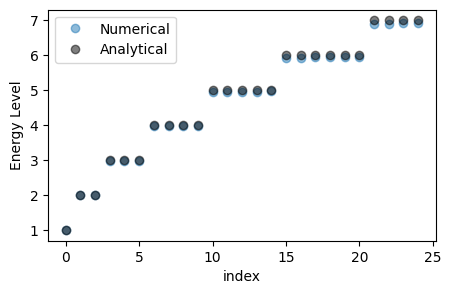

In [54]:
nm = np.stack(np.meshgrid(np.arange(10),np.arange(10)), axis=-1).reshape(-1, 2)
Enm = 1+nm[:,0]+nm[:,1]
nm = nm[Enm.argsort()]
Enm = np.sort(Enm)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, figsize=(5, 3))
axs.plot(energy_levels[:25], 'o',alpha=0.5, label="Numerical")
axs.plot(Enm[:25], 'o', color='k',alpha=0.5, label="Analytical")
plt.legend()
plt.xlabel("index")
plt.ylabel("Energy Level")
plt.show()

Each point represents an eigenvalue, which corresponds to an energy level of the quantum harmonic oscillator. Up to errors produced by the finite boundary (at [-30,30]) and discretization, we see the familiar $E_{nm} = (1/2+n)+(1/2+m)$ energy levels for the 2d oscillator.

Lastly, we visualize the corresponding eigenfunctions:

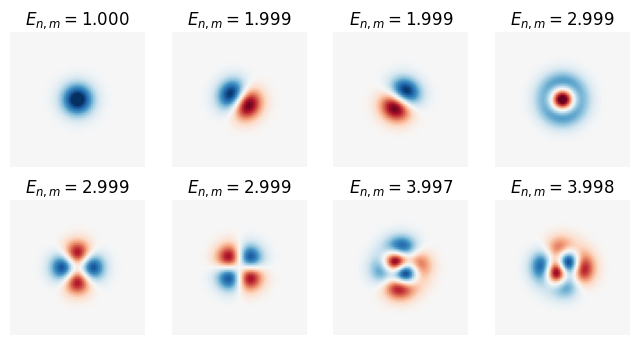

In [63]:
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(8, 4))
for i,ax in enumerate(axs.flatten()):
    l = 30
    ax.imshow(eigenfunctions[:, i].reshape(N,N)[N//2-l:N//2+l,N//2-l:N//2+l],
    extent=[grid[N//2-l],grid[N//2+l],grid[N//2+l],grid[N//2-l]],
    cmap='RdBu_r', vmin=-0.1, vmax=0.1)
    ax.set_title(r"$E_{{{}}} ={:.3f}$".format("n,m",e2[i]))
    ax.axis('off')

Each subplot represents an eigenfunction, reshaped to 2D and displayed as an image. The eigenfunctions correspond to the wave functions of the quantum harmonic oscillator at different energy levels. The color represents the value of the wave function at each point in the grid. The title of each subplot shows the corresponding eigenvalue, or energy level.

Through this example, we have shown how to solve for the energy levels and wave functions of a quantum harmonic oscillator using the CoLA library.

## Solving the Schrodinger Eq for the Hydrogen atom in 3d, diagonalizing non hermitian Hamiltonians via compactifying transform

In [ ]:
# e3 = jnp.linalg.eigvalsh(H.to_dense())
# print(np.sort(e3)[:10])

/data/users/marc_f/cola/cola/ops.py:78: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in eye is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return self @ self.ops.eye(self.shape[-1], dtype=self.dtype)


[ 41.57455   41.575943  41.576588  41.577152  41.5774    41.57964
  41.582     41.584194 152.37383  152.37447 ]


In [15]:
# import os
# import time
# import numpy as np
# import jax.numpy as jnp
# from jax import vmap, jit
# import jax
# from jax import jacfwd
# from jax.config import config
# import cola
# from jax.config import config; config.update("jax_enable_x64", True)
# jax.config.update('jax_platform_name', 'cpu')

# def square_compactification(x):
#     return jnp.arctan(x) * 2 / jnp.pi


# def inv_square_compactification(y):
#     return jnp.tan(y * jnp.pi / 2)


# # define the hydrogen atom Hamiltonian transformed coordinates
# N = 1_000
# ndims = 1

# grid = jnp.linspace(-1 + .001, 1 - .001, N)  # convert to 3d with mesgrid

# # grid = jnp.linspace(-1,1,N)
# # grid = jnp.linspace(-40,40,N)
# print(grid.dtype)
# wgrid = jnp.stack(jnp.meshgrid(*(ndims * [grid])), axis=-1).reshape(-1, ndims)
# idd = lambda x: x

# T = square_compactification  #idd#lambda x: jax.scipy.stats.norm.cdf(norm(x)/3)*x/norm(x)#jnp.log(1e-1+norm(x))*x/norm(x)#radial_hyperbolic_compactification
# Tinv = inv_square_compactification  #idd#lambda x: 3*jax.scipy.special.ndtri(norm(x))*x/norm(x)#(jnp.exp(norm(x))-1e-1)*x/norm(x)#inv_radial_hyperbolic_compactification
# xyz = vmap(Tinv)(wgrid)
# print(xyz[0], xyz[-1])
# DT = vmap(jacfwd(T))(xyz)  # (b, 3-out, 3-in)
# laplacian_factor2 = DT @ DT.transpose((0, 2, 1))
# laplacian_factor1 = vmap(lambda z: (jacfwd(jacfwd(T))(z) * jnp.eye(ndims)[None, :, :]).sum((1, 2)))(
#     xyz)
# dw = grid[1] - grid[0]
# deriv = jnp.array([-1 / 2, 0., 1 / 2]) / dw


# # deriv = jnp.array([-1.,1.])/dw
# # di = lambda x,i: sp.ndimage.correlate1d(x,deriv,axis=i,mode='constant')
# def hdiag(x):
#     cderiv = lambda x: jax.scipy.signal.correlate(x, jnp.array([1., -2, 1.]) / dw**2, mode='same')
#     dds = jnp.stack([jnp.apply_along_axis(cderiv, i, x).reshape(-1) for i in range(ndims)], axis=0)
#     embedded_diag = vmap(jnp.diag, -1, -1)(dds).transpose((2, 0, 1))
#     return embedded_diag


# jderiv = lambda x: jax.scipy.signal.correlate(x, deriv, mode='same')  # BCS?
# di = lambda x, i: jnp.apply_along_axis(jderiv, i, x)
# d = lambda x, axis=-1: jnp.stack([di(x, i) for i in range(ndims)], axis=axis)


# # lap= lambda x: scipy.ndimage.laplace(x,mode='constant')/dw**2
# def lap(x):
#     cderiv = lambda x: jax.scipy.signal.correlate(x, jnp.array([1., -2, 1.]) / dw**2, mode='same')
#     return sum([jnp.apply_along_axis(cderiv, i, x).reshape(-1) for i in range(ndims)])


# def vfn(x):
#     return (x * x).sum() / 2


# # def vfn(x):
# #     return (x*x).sum()/2


# @jit
# def laplacian(psi):
#     psi_grid = psi.reshape(*(ndims * (N, )))
#     #     return lap(psi_grid).reshape(psi.shape)
#     # return out

#     # return (hessian*jnp.eye(ndims)[None]).sum((1,2)).reshape(psi.shape)
#     dpsi = d(psi_grid)
#     hessian = d(dpsi).reshape(-1, ndims, ndims)
#     hessian = jnp.where(jnp.eye(ndims)[None] + 0 * hessian > 0.5, hdiag(psi_grid), hessian)
#     l1 = (dpsi.reshape(-1, ndims) * laplacian_factor1).sum(-1)
#     l2 = (hessian * laplacian_factor2).sum((1, 2))
#     return (l1 + l2).reshape(psi.shape)


# L = cola.ops.LinearOperator(jnp.float64, shape=(N**ndims, N**ndims),     matmat=jit(vmap(laplacian, -1, -1)))
# v = vmap(vfn)(xyz).reshape(-1)
# V = cola.diag(v)
# H = -L / 2 + V


# e2, v2, _ = cola.eig(H, method='arnoldi', max_iters=int(N * 1.))

float64
[-636.61924877] [636.61924877]


In [16]:
H.shape

(1000, 1000)

In [17]:
import numpy as np
es = np.linalg.eigvals(H.to_dense())

In [18]:
np.sort(e2)[:60]

array([-4.90754888e+03-1311.69329267j, -4.90754888e+03+1311.69329267j,
       -4.29453649e+03-1641.25722276j, -4.29453649e+03+1641.25722276j,
       -3.84794755e+03-1858.37727594j, -3.84794755e+03+1858.37727594j,
       -3.48252843e+03-2016.43973032j, -3.48252843e+03+2016.43973032j,
       -3.16767199e+03-2136.5828298j , -3.16767199e+03+2136.5828298j ,
       -2.88830824e+03-2229.78326565j, -2.88830824e+03+2229.78326565j,
       -2.63571636e+03-2302.61280987j, -2.63571636e+03+2302.61280987j,
       -2.40431751e+03-2359.37542428j, -2.40431751e+03+2359.37542428j,
       -2.19028874e+03-2403.07100833j, -2.19028874e+03+2403.07100833j,
       -1.99087537e+03-2435.8888709j , -1.99087537e+03+2435.8888709j ,
       -1.80401439e+03-2459.48436367j, -1.80401439e+03+2459.48436367j,
       -1.62811452e+03-2475.14347346j, -1.62811452e+03+2475.14347346j,
       -1.46191924e+03-2483.90006492j, -1.46191924e+03+2483.90006492j,
       -1.30435261e+03-2486.5542206j , -1.30435261e+03+2486.5542206j ,
      

In [19]:
np.sort(es)[:20]

array([ 0.49999913,  1.49999185,  2.49997236,  3.49992991,  4.49985116,
        5.49971871,  6.49951162,  7.49920517,  8.49877097,  9.49817688,
       10.49738703, 11.49636184, 12.49505793, 13.49342818, 14.49142167,
       15.48898368, 16.48605563, 17.48257509, 18.47847573, 19.47368727])



# CoLA Library Exercise

This exercise will help you get familiar with the CoLA. 

## Installation
You need a Python 3.10+ environment with either JAX or PyTorch installed (or both). You can install CoLA using pip as follows:

In [ ]:
%pip install git+https://github.com/wilson-labs/cola.git
    
%load_ext autoreload
%autoreload 2


Alternatively, you can open the documentation in Colab and start working from there: [Quick Start](https://colab.research.google.com/github/wilson-labs/cola/blob/master/docs/notebooks/colabs/Quick_Start.ipynb)

We strongly recommend that you read through the [documentation](https://cola.readthedocs.io/en/latest/index.html) to understand the library better.

## Basic Exercises
We'll start with some basic exercises to get you warmed-up for later. For each of the following, you can use either JAX or PyTorch. We recommend that you try both and see if you spot any difference on the behavior of CoLA.

As explained in [Linear Operators: What and Why?](https://cola.readthedocs.io/en/latest/notebooks/LinOpIntro.html) `LinearOperators` are an efficient and scalable manner to represent matrices. To illustrate how to use the `LinearOperators` available in `CoLA`, I'm going to create a `Dense` `LinearOperator` using PyTorch.

In [1]:
import cola
import torch

dtype = torch.float32
A = torch.tensor([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]], dtype=dtype)
A_op = cola.ops.Dense(A)
print(A_op)
print(type(A_op))
print(A_op.dtype)
print(A_op.shape)

Dense
<class 'cola.ops.operators.Dense'>
torch.float32
torch.Size([3, 3])


As you can see from the prints, `A_op` is no longer a `torch.tensor`!

The `LinearOperator` class is quite simple as it only requires that we define three minimum requirements: (1) a `dtype`, (2) a `shape` and (3) a `matmul` function. In the dense case above, all these requirements are taken from the matrix $A$. 

In [ ]:
ones = torch.ones(size=(A.shape[0],), dtype=dtype)
print(A_op @ ones)
print(A @ ones)

In both cases we get the same results and, notably, we can use the same syntax that we are accustomed to!
You can find all the available operators [here](https://cola.readthedocs.io/en/latest/package/cola.ops.html).

Now, create a diagonal `LinearOperator` using the `cola.ops.Diagonal` class, where the diagonal should be equal to $d=(-1, 2, 3)^T$ and a tridiagonal `LinearOperator` with a diagonal full of ones and the upper and lower bands being $\alpha=(-1/2, 1/4)^T$. _Hint:_ Should $\beta$ had the same shape as $\alpha$?.

In [ ]:
diagonal = torch.tensor(_, dtype=dtype)
D_op = cola.ops.Diagonal(_)
alpha = torch.tensor(_, dtype=dtype)
beta = _
T_op = cola.ops.Tridiagonal(alpha, beta, _)

Create a dense version of each of these `LinearOperators` using the `to_dense()` method and print the results.

In [ ]:
D = _ 
T = _

Then, perform some basic operations like addition, subtraction, and multiplication on the previous operators. Verify that the computations are correct using the dense API. I suggested one set of binary operations below, but please try more!

In [ ]:
print(_)
print(A + D - T)

Arguably the most popular linear algebra operation is solving a linear system, the so called "solves". You are now going to solve a linear system generated from a random matrix using CoLA. What function should you use from the [high level interface](https://cola.readthedocs.io/en/latest/package/cola.linalg.html)? Here is some code to create a random problem.

In [ ]:
from jax import numpy as jnp
from jax.random import PRNGKey, normal, split

N = _
key = PRNGKey(seed=21)
A = normal(key, shape=(N, N))
key = split(key, num=1)
rhs = normal(key, shape=(N,))
rhs /= jnp.linalg.norm(rhs)

Now, create a dense `LinearOperator` and find the solution. Compare it to the solution found using `JAX`'s own solver implementation.

In [ ]:
soln = _
soln_jax = jnp.linalg.solve(A, rhs)
abs_diff = jnp.linalg.norm(_)
print(f"{abs_diff:1.2e}")

What floating point precision was used in the previous case? Is this relevant? Why or why not?

_[Answer Here]_

In the previous exercise, CoLA dispatched a general linear solver as it did not have any extra information about the `LinearOperator` that it could exploit. Lets see how to add some information about the operator such as being PSD, self-adjoint or symmetric if real.
In CoLA we do this using annotation operators like `cola.PSD`, `cola.SelfAdjoint` and `cola.Symmetric`. Let's work with a PSD matrix now.
Construct a `LinearOperator` $S = A A^T + \mu I$. _Hint_: make $A$ dense, use `cola.ops.I_like` (see [docs](https://cola.readthedocs.io/en/latest/package/cola.ops.html#cola.ops.I_like)) and forget that you are using CoLA. Don't forget to annotate your operator!

In [ ]:
from jax.config import config
config.update("jax_enable_x64", True)

N = 1_000
key = PRNGKey(seed=21)
dtype = jnp.float64
A = cola.ops.Dense(normal(key, shape=(N, N)))
mu = 1.e-1  # a large enough value ensures PSD
S = _

Having a PSD `LinearOperator` opens up the possiblity in CoLA to dispatch our favorite algorithm: CG. As we all know, CG has a couple of hyperparameters like the tolerance (set it to $10^{-10}$) and the max number of iterations (set it to 10K). _Hint_: Pass `method`, `tol` and `max_iters` to the function that you used in the previous exercise. To see what is going on under the hood, take a look at the [source code](https://github.com/wilson-labs/cola/blob/main/cola/linalg/inverse.py#L67).

In [ ]:
soln = _ @ rhs
soln_jax = jnp.linalg.solve(S, rhs)
abs_diff = jnp.linalg.norm(soln - soln_jax)
print(f"{abs_diff:1.2e}")

Why is the difference much smaller that in the previous exercise?

_[Answer Here]_

To conclude the basic set of exercises lets focus on another fundamental linear algebra operation: eigendecomposition. For this case, use the $T$ matrix used here: 
[Linear Operators: What and Why?](https://github.com/wilson-labs/cola/blob/main/docs/notebooks/LinOpIntro.ipynb). Get the eigendecomposition of $T$ using double precision and compare it with PyTorch or JAX's implementation. _Hint_: Check CoLA's [API](https://cola.readthedocs.io/en/latest/package/cola.linalg.html) and maybe use an annotation?

In [ ]:
N = 100
dtype = _
abs_diff = _
print(f"{abs_diff:1.2e}")

Are different algorithms being used? Is there a runtime benefit from dispatching a different algorithm?

_[Answer Here]_


## Large Scale Machine Learning with CoLA

Using JAX or PyTorch, pick any 3 out of the 5:

### 1. GP

GP Implement Gaussian Process (GP) inference with Radial Basis Function (RBF) kernel using `inverse()` from scratch on a dataset with at least 10k observations. You are not allowed to use GPyTorch. The formula for the GP posterior is:

$$f_* | X, y, X_* \sim \mathcal{N}(\mu_*, \Sigma_*)$$

where:

$$\mu_* = K(X_*, X)[K(X, X) + \sigma^2_n I]^{-1}y$$

$$\Sigma_* = K(X_*, X_*) - K(X_*, X)[K(X, X) + \sigma^2_n I]^{-1}K(X, X_*)$$

Here, $K$ is the RBF kernel, $X$ are the training inputs, $y$ are the training targets, $X_*$ are the test inputs, and $\sigma^2_n$ is the noise variance.


In [ ]:
!wget -O bike.mat "https://www.andpotap.com/static/bike.mat"

In [ ]:
from jax import numpy as jnp
import os
import numpy as np
from math import floor
from scipy.io import loadmat
import cola


def load_uci_data(data_dir, dataset, train_p=0.75, test_p=0.15):
    file_path = os.path.join(data_dir, dataset + '.mat')
    data = np.array(loadmat(file_path)['data'])
    X = data[:, :-1]
    y = data[:, -1]

    X = X - X.min(0)[None]
    X = 2.0 * (X / X.max(0)[None]) - 1.0
    y -= y.mean()
    y /= y.std()

    train_n = int(floor(train_p * X.shape[0]))
    valid_n = int(floor((1. - train_p - test_p) * X.shape[0]))

    split = split_dataset(X, y, train_n, valid_n)
    train_x, train_y, valid_x, valid_y, test_x, test_y = split

    return train_x, train_y, test_x, test_y, valid_x, valid_y


def split_dataset(x, y, train_n, valid_n):
    train_x = x[:train_n, :]
    train_y = y[:train_n]

    valid_x = x[train_n:train_n + valid_n, :]
    valid_y = y[train_n:train_n + valid_n]

    test_x = x[train_n + valid_n:, :]
    test_y = y[train_n + valid_n:]
    return train_x, train_y, valid_x, valid_y, test_x, test_y


train_x, train_y, *_, test_x, test_y = load_uci_data(data_dir="./", dataset="bike")

dtype = jnp.float32
train_x, train_y = jnp.array(train_x, dtype=dtype), jnp.array(train_y, dtype=dtype)
test_x, test_y = jnp.array(test_x, dtype=dtype), jnp.array(test_y, dtype=dtype)

Write a function to compute the RBF kernel. Use the dim expansion trick below

In [ ]:
def compute_rbf_cov(xi, xj):
    xi, xj = jnp.expand_dims(xi, -2), jnp.expand_dims(xj, -3)
    res = _
    return res

Below I suggested some fixed hyperparameters. Finish computing the operators needed.

In [ ]:
ls = jnp.array(100., dtype=dtype)
noise = jnp.array(1., dtype=dtype)
oscale = jnp.array(1., dtype=dtype)
K_train_train = cola.ops.Dense(oscale * compute_rbf_cov(train_x / ls, _))
K_test_train = _
K_test_test = _
K = cola.PSD(K_train_train + noise * _)
mu = _
Sigma = _

Now compute the negative log-marginal likelihood for the kernel hyperparameters that you have. _Hint:_ You might want to use stochastic lanczos quadrature from CoLA's [algorithms](https://cola.readthedocs.io/en/latest/package/cola.algorithms.html).


### 2. Hessian Spectrum
Compute the eigenspectrum of the Hessian of a pretrained neural network. You can download weights of image classifiers pretrained on CIFAR10. Use `cola.algorithms.stochastic_lanczos_quadrature` and the spectral KDE smoothing method from [this paper](https://arxiv.org/pdf/1901.10159.pdf) (algorithm 1) to get a smoothed spectrum estimate.


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.nn.utils import stateless

# Load CIFAR10 dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=False, num_workers=2)
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)
model = model.to(device='cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()


def flatten_params(params):
    shapes = [p.shape for p in params]
    flat_params = torch.cat([p.flatten() for p in params])
    return flat_params, shapes


def unflatten_params(flat_params, shapes):
    params = []
    i = 0
    for shape in shapes:
        size = torch.prod(torch.tensor(shape)).item()
        param = flat_params[i:i + size]
        param = param.view(shape)
        params.append(param)
        i += size
    return params


flat_p, shape = flatten_params(list(model.parameters()))
flat_p = flat_p.detach().requires_grad_(True)


def stateless_model(fparams, x):
    params = unflatten_params(fparams, shape)
    names = list(n for n, _ in model.named_parameters())
    nps = {n: p for n, p in zip(names, params)}
    return stateless.functional_call(model, nps, x)


def loss_fn(params):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    total_loss = 0.0
    for i, (images, labels) in enumerate(trainloader):
        outputs = stateless_model(params, images.to(device))
        loss = criterion(outputs, labels.to(device))
        total_loss += loss
        if i > 10:
            break  # For now we will only use a subset of the data
    return total_loss / len(trainloader)

grads = torch.autograd.grad([loss_fn(flat_p)], flat_p, create_graph=True)

Use cola.ops.Hessian. or write your own LinearOperator.

SLQ takes in a function to evaluate the nodes. What is the input shape of `x` below and what should be the output shape of `out` below? Is `fn` correctly defined?

_[Answer Here]_

In [ ]:
def fn(x, mean=torch.tensor(0.), sigma=torch.tensor(1.)):
    cons = 0.5 * torch.sqrt(2 * torch.pi * sigma)
    out = cons * torch.exp(-0.5 * (x - mean) ** 2. / sigma)
    return out


out = cola.algorithms.stochastic_lanczos_quad(_)
print(out)


### 3. Linear Regression
Implement linear regression with a heteroscedastic noise model where $\Phi$ is the design matrix, $\beta$ are the parameters and $\sigma_i$ is the measurement noise. The model is:

$$y = \Phi \beta + \epsilon, \quad \epsilon \sim \mathcal{N}(0, D)$$

where $D$ is a diagonal matrix with $\sigma_i^2$ on the diagonal. Add a Gaussian prior (regularization) if necessary. Hint: $\hat{\beta}_{MLE} = (\Phi^T D^{-1} \Phi)^{-1} \Phi^T D^{-1} y$

Below is some code to load the data

In [ ]:
import torch

train_x, train_y, *_, test_x, test_y = load_uci_data(data_dir="./", dataset="bike")

dtype = torch.float32
train_x, train_y = torch.tensor(train_x, dtype=dtype), torch.tensor(train_y, dtype=dtype)
test_x, test_y = torch.tensor(test_x, dtype=dtype), torch.tensor(test_y, dtype=dtype)

In this setting you have to propose a function $\sigma(x)$ which changes depending on the input. Usually, this $\sigma(x)$ functions grow with the magnitude of $x$. What comes to mind? _Hint:_ don't forget that $\sigma(x)$ should be a positive scalar.

In [ ]:
sigma = 0.1
sigma_x = sigma * _
D = cola.ops.Diagonal(sigma_x)

Compute $\beta_{\text{MLE}}$ don't forget to add some diagonal regularization ($\mu$).

In [ ]:
Phi = _
mu = 0.05
Phi_inv = _
beta_mle = Phi_inv @ Phi.T @ cola.inverse(D) @ train_y
print(beta_mle)

Compute the test RMSE. What about trying another functional form for $\sigma(x)$? Did that change improve the Test RMSE?

In [ ]:
test_rmse = _
print(f"Test RMSE: {test_rmse:1.3e}")

### 4. Implement pagerank to find the most influential pages of Wikipedia.
 From the transition matrix on the [Linked- WikiText-2 dataset](https://rloganiv.github.io/linked-wikitext-2/#/), compute the largest eigenvector using `cola.eigmax`. From this eigenvector, rank the values to determine which web pages are most influential.

The PageRank algorithm computes the stationary distribution of a Markov chain. Given a transition matrix $P$, the PageRank vector $r$ is the eigenvector corresponding to the largest eigenvalue (which should be 1 for a stochastic matrix).

The transition matrix $P$ is defined as:

$$P = (1-\alpha)W + \alpha \mathbf{1}\mathbf{1}^T$$

where $W$ is the adjacency matrix normalized by the degree, $\alpha$ is the damping factor (usually set to 0.15), and $\mathbf{1}$ is a vector of ones.

The adjacency matrix $A_{ij}$ is 1 if there is a link from page $i$ to page $j$ (not the other way around). The degree-normalized adjacency matrix $W$ is obtained by dividing each row of $A$ by its sum.

The PageRank vector $r$ can be found by solving the eigenproblem:

$$P^T r = r$$

The entries of $r$ give the PageRank scores of the pages. The pages can then be ranked by these scores to find the most influential ones.


Below is some starter code to create an adjacency matrix. The pages are in the form of Wikipedia QIDs. After finding the most popular QIDs, if they are not in the `page_to_title dict`, you can look them up using the wikipedia API with the `get_titles_from_wikidata` function.

Suggestion: use the `cola.ops.Sparse` matrix for the adjacency matrix.

In [ ]:
%pip install requests
%pip install io
%pip install zipfile

In [ ]:
import cola
import torch
import json
import numpy as np
import requests
from collections import defaultdict
import zipfile
import io

# Request the zipped data
link = "https://rloganiv.github.io/linked-wikitext-2/static/media/linked-wikitext-2.142e2e52.zip"
r = requests.get(link)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Initialize a dictionary to hold the adjacency list
adjacency_list = defaultdict(set)

# Initialize a dictionary to map page ids to indices
page_to_index, index_to_page, page_to_title, next_index = {}, {}, {}, 0

# Extract the JSONL file
files = ['valid.jsonl', 'train.jsonl', 'test.jsonl']
for file in files:
    with z.open(file) as f:
        data = f.read().decode()
        for line in data.splitlines():
            data = json.loads(line)
            current_page_id = data['annotations'][0]['id']

            page_to_title[current_page_id] = data['title']
            # If the current page id is not in the dictionary, add it
            if current_page_id not in page_to_index:
                page_to_index[current_page_id] = next_index
                index_to_page[next_index] = current_page_id
                next_index += 1

            current_page_index = page_to_index[current_page_id]
            for annotation in data['annotations']:
                # If the annotation is a link to another page, add it to the adjacency list
                if (annotation['source'] == 'WIKI') and (annotation['id'] != current_page_id):
                    linked_page_id = annotation['id']

                    # If the linked page id is not in the dictionary, add it
                    if linked_page_id not in page_to_index:
                        page_to_index[linked_page_id] = next_index
                        index_to_page[next_index] = linked_page_id
                        next_index += 1

                    linked_page_index = page_to_index[linked_page_id]
                    adjacency_list[current_page_index].add(linked_page_index)

num_pages = len(page_to_index)
adjacency_matrix = np.zeros((num_pages, num_pages), dtype=int)
for page_index, linked_page_indices in adjacency_list.items():
    for linked_page_index in linked_page_indices:
        adjacency_matrix[page_index, linked_page_index] = 1

Transform the adjacency matrix into a torch tensor and get the max eigenvalue and eigenvector.

In [ ]:
dtype = torch.float32
norm = _
norm = torch.where(norm == 0., torch.tensor(1.), norm)
W = cola.ops.Dense(adjacency_matrix / norm)
alpha = 0.15
P = _ + alpha * ones @ ones.T
eigvec_max, eig_max = cola.eigmax(P.T)
_, indices = torch.sort(eigvec_max, descending=True)
print(indices[:10])

Try running this with the sparse representation in CoLA.

In [ ]:
def get_titles_from_wikidata(qids):
    qids_string = '|'.join(qids)
    url = 'https://www.wikidata.org/w/api.php'
    params = {
        'action': 'wbgetentities',
        'ids': qids_string,
        'format': 'json',
        'props': 'labels',
        'languages': 'en'
    }
    response = requests.get(url, params=params)
    data = response.json()
    titles = {}
    for qid, entity in data['entities'].items():
        if 'en' in entity['labels']:
            titles[qid] = entity['labels']['en']['value']
    return titles


### 5. Make a pull request to CoLA.
 e.g., improvement to the documentation, new commonly used linear operator (e.g., Fisher information matrix, banded matrix, FFT matrix), bug fix. If your code for one of the above exercises is particularly clean, consider adding markdown text explaining the steps and let's add it to the CoLA documentation under examples.


In [1]:
from plum import dispatch
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
@dispatch(cond = lambda a: a>0)
def test(a: int):
    return -a

@dispatch
def test(a: str):
    return a

@dispatch
def test(a):
    return a
    

In [3]:
test("a")

INFO:root:Dispatched on test(str)


'a'

In [4]:
test.methods

[Signature(int, implementation=<function test at 0x7f68c4491ab0>),
 Signature(str, implementation=<function test at 0x7f68c4491a20>),
 Signature(typing.Any, implementation=<function test at 0x7f68c4491b40>)]

In [5]:
test._resolved

[(<function __main__.test(a: int)>,
  None,
  <function __main__.<lambda>(a)>,
  0,
  False),
 (<function __main__.test(a: str)>, None, None, 0, False),
 (<function __main__.test(a)>, None, None, 0, False)]

In [6]:
with test.disable_methods((str,)):
    test(2)
    test("a")
    test("b")
    logging.warning(test(-2))
    logging.warning(test(22))

INFO:root:Dispatched on test(int) with cond=<lambda>
INFO:root:Dispatched on test(typing.Any)
INFO:root:Dispatched on test(typing.Any)
INFO:root:Dispatched on test(typing.Any)
INFO:root:Dispatched on test(int) with cond=<lambda>


In [7]:
test._resolved

[(<function __main__.test(a: int)>,
  None,
  <function __main__.<lambda>(a)>,
  0,
  False),
 (<function __main__.test(a: str)>, None, None, 0, False),
 (<function __main__.test(a)>, None, None, 0, False),
 (<function <function test at 0x7f68c4491ab0> with 2 registered and 1 pending method(s)>,
  Signature(str),
  None,
  None,
  True)]

In [8]:
test.methods

TypeError: None is not a callable object

In [5]:
test("a")

INFO:root:Dispatched on test(str)


'a'